# Lead Scoring Case Study

## Importing Libraries

In [1]:
# Importing Libraries

## Data libraries
import numpy as np
import pandas as pd

## Visulaisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Model building related libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')


## Reading data

In [3]:
df = pd.read_csv('Leads.csv')
pd.options.display.max_columns = None
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

##  Exploratory Data Analysis

### Data Understanding

In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- As we can see that there are only 7 numerical columns and remaining 30 columns are categorical columns.

In [6]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

- From above the columns namely 'TotalVisits', 'Total Time Spent on Website' & 'Page Views Per Visit' are having outliers, so we need to treat them.

### Data Cleaning

In [7]:
# Removing the unnecessary columns

redun_col = ['Prospect ID', 'Lead Number', 'Country', 'I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview', 'City']

lead_dr_df = df.drop(redun_col, axis=1)

In [8]:
# Checking the dataset

lead_dr_df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High  

In [9]:
lead_dr_df.shape

(9240, 31)

In [10]:
lead_dr_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Last Notable Activity'],
      dtype='object')

In [11]:
lead_dr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

In [12]:
## Checking value counts in categorical

for col in lead_dr_df.columns:
    if lead_dr_df[col].dtype == 'object':
        # print the value counts for the column
        print(lead_dr_df[col].value_counts())
        print('*'*40)
    

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
****************************************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
****************************************
No     8506
Yes     734
Name: Do Not Email, dtype: int64
****************************************
No     9238
Yes       2
Name: Do Not Call, dtype: 

- From above we observe that there are some columns with labels 'Select', which means that the customer didn't select any of the given options, hence lets treat them as null values. 

In [13]:
# Now replacing label 'Select' with Null values

lead_dr_df.Specialization = lead_dr_df.Specialization.replace('Select',None)
lead_dr_df['How did you hear about X Education'] = lead_dr_df['How did you hear about X Education'].replace('Select',None)
lead_dr_df['Lead Profile'] = lead_dr_df['Lead Profile'].replace('Select',None)


In [14]:
lead_dr_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [15]:
lead_dr_df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [16]:
lead_dr_df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
# Checking the null values

round(100*lead_dr_df.isnull().sum()/len(lead_dr_df),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Dropping the columns having more than 35% of the null values

In [18]:
# Dropping the columns having more than 35% of the null values

lead_dr_df=lead_dr_df.dropna(thresh=len(lead_dr_df)*0.65,axis=1)

In [19]:
# Checking the null values

round(100*lead_dr_df.isnull().sum()/len(lead_dr_df),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [20]:
# Checking the shape

lead_dr_df.shape

(9240, 22)

#### Checking columns which are having less than 35% of null values

In [21]:
# Checking the Lead Source col.

lead_dr_df['Lead Source'].value_counts().head()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

- Since 'Google' is the mode, lets impute the null values with 'Google'.

In [22]:
# Checking the Total Visits col.

lead_dr_df['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

- Since the most occuring value here is '0.0', therefore imputing the missing values with '0.0'.

In [23]:
# Checking the Page Views Per Visit col.

lead_dr_df['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

- Lets impute null with mode

In [24]:
# Checking the Last Activity col.

lead_dr_df['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

- Since the most occuring value here is 'Email Opened', therefore imputing the missing values with 'Email Opened'.

In [25]:
# Checking the What is your current occupation  col.

lead_dr_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- Since the most occuring value here is 'Unemployed', therefore imputing the missing values with 'Unemployed'.

In [26]:
# Checking the What matters most to you in choosing a course col.

lead_dr_df['What matters most to you in choosing a course'].value_counts().head()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Since the most occuring value here is 'Better Career Prospects', therefore imputing the missing values with 'Better Career Prospects'.

In [27]:
# Now imputing the missing values as per their respective values.

missing_val = {'Lead Source':'Google', 'TotalVisits':'0.0', 'Page Views Per Visit':'0.0', 'Last Activity':'Email Opened',
              'What is your current occupation':'Unemployed', 
               'What matters most to you in choosing a course':'Better Career Prospects'}

lead_dr_df = lead_dr_df.fillna(value = missing_val)


In [28]:
# Checking the null values once more

lead_dr_df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

#### Now there are no null values present in the dataset.

**Above we saw that lead source column has redundant value for Google, so lets correct it**

In [29]:
# Checking the Lead Source column for redundant values

lead_dr_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- We found that the '__Google__' is being misprinted as '__google__' which is making a duplicate in our data and can harm our analysis.
- We need to treat it to make it same as '__Google__'.

In [30]:
# Treating the misprinted word

lead_dr_df['Lead Source'] = lead_dr_df['Lead Source'].apply(lambda x:x.capitalize())
lead_dr_df['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Social media            2
Live chat               2
Press_release           2
Pay per click ads       1
Blog                    1
Welearn                 1
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Nc_edm                  1
Name: Lead Source, dtype: int64

Now the dataset is good for the further analysis as all the values.

In [31]:
lead_dr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   object
 3   Do Not Call                                    9240 non-null   object
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

**Page Views Per Visit and TotalVisits have numerical data, so lets convert it into numeric**

In [32]:
lead_dr_df.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
0.0       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [33]:
lead_dr_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [34]:
# converting Page Views Per Visit and TotalVisits to float

lead_dr_df['Page Views Per Visit'] = lead_dr_df['Page Views Per Visit'].astype(float)
lead_dr_df['TotalVisits'] = lead_dr_df['TotalVisits'].astype(float)

### Analysing different variables and creating Visualizations

In [35]:
# Calculate the percentage distribution of 'Convert' variable
convert_counts = lead_dr_df['Converted'].value_counts()
convert_percentages = (convert_counts / convert_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
colors = ['skyblue', 'lightcoral']
plt.pie(convert_percentages, labels=convert_percentages.index, autopct='%1.1f%%', colors=colors)
plt.title("Convert Variable Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [36]:

# Assuming 'df' is your DataFrame with the lead data
lead_origin_counts = lead_dr_df['Lead Origin'].value_counts()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=lead_origin_counts.index, y=lead_origin_counts.values)
plt.title("Lead Origin Distribution")
plt.xlabel("Lead Origin")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
lead_source_counts = lead_dr_df['Lead Source'].value_counts()
# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Plot the bar chart
lead_source_counts.plot(kind='bar', color='skyblue')

# Customize the plot labels and title
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.title('Lead Source Distribution')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [38]:
# plotting boxplot w.r.t. the target variable
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_dr_df)
plt.show()

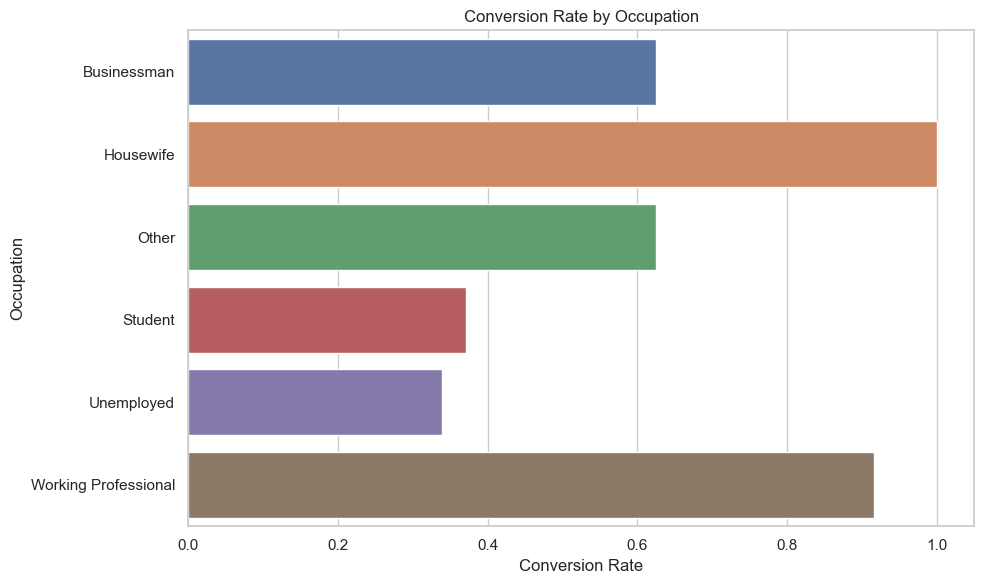

In [39]:
# Calculate the conversion rate for each occupation
conversion_rate_occupation = lead_dr_df.groupby("What is your current occupation")["Converted"].mean().reset_index()

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=conversion_rate_occupation, x="Converted", y="What is your current occupation")
plt.xlabel("Conversion Rate")
plt.ylabel("Occupation")
plt.title("Conversion Rate by Occupation")
plt.tight_layout()

# Show the plot
plt.show()



#### Inferences:
- There is little imbalance in Converted variable: 38.5% leads are converted and 61.5% leads are not.
- Landing Page Submission forms the main lead origin channel.
- Most leads are sourced through Google.
- The median of total spent on website is more for Converted leads than for non-converted leads. 
- Leads with occupation such as Housewife and Working Professionals have higher conversion rates than other leads .

## Data Preparation

- Now lets convert the yes/no columns to numerical

In [40]:
# Yes : 1
# No : 0

category = {'Yes':1, 'No':0}

bi_categ_cols = ['Do Not Email','Do Not Call','Magazine','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content']

for col in bi_categ_cols:
    lead_dr_df[col] = lead_dr_df[col].map(category)



- After converting the binary categories from 'Yes' to 1 & 'No' to 0 and correcting datatype of Page Views Per Visit and TotalVisits we will now create __dummy variables__.

In [41]:
# Creating dummy variables for the 8 categories and dropping the first level

dummy = pd.get_dummies(lead_dr_df[['Lead Origin','Lead Source','Last Activity' 
                                   ,'What is your current occupation', 'What matters most to you in choosing a course',
                                   'Last Notable Activity']], drop_first=True)

# Adding the dummies to the original dataset

lead_dr_df = pd.concat([lead_dr_df,dummy], axis=1)


In [42]:
lead_dr_df.shape

(9240, 83)

In [43]:
lead_dr_df.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark chat             0            0   
1                      API  Organic search             0            0   
2  Landing Page Submission  Direct traffic             0            0   
3  Landing Page Submission  Direct traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity What is your current occupation  \
0  Page Visited on Website                      Unemployed   
1             Email Opened                      Unemployed   
2             Email Opened                         Student   
3              Unreachable                      Unemployed   
4        Converted to Lead                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Blog  Lead Source_Click2call  \
0                           0                 0                       0   
1                           0                 0                       0   
2                           0                 0              

- Now removing the __Duplicate columns__

In [44]:
# We have created a dummies for the below categories hence removing the original column.

dup = ['Lead Origin','Lead Source','Last Activity' ,'What is your current occupation', 
       'What matters most to you in choosing a course','Last Notable Activity']

lead_dr_df = lead_dr_df.drop(dup, axis=1)
lead_dr_df.shape

(9240, 77)

In [45]:
# Removing redundant columns from the dataset

redun = ['Receive More Updates About Our Courses','Update me on Supply Chain Content',
         'Get updates on DM Content','Magazine']

lead_dr_df = lead_dr_df.drop(redun, axis=1)

In [46]:
lead_dr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

**Now the datatype of all the columns is numeric**

### Checking for Outliers

In [47]:
round(lead_dr_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95,0.99]),2)

Do Not Email  Do Not Call  Converted  TotalVisits  \
count       9240.00      9240.00    9240.00      9240.00   
mean           0.08         0.00       0.39         3.39   
std            0.27         0.01       0.49         4.84   
min            0.00         0.00       0.00         0.00   
15%            0.00         0.00       0.00         0.00   
35%            0.00         0.00       0.00         2.00   
50%            0.00         0.00       0.00         3.00   
55%            0.00         0.00       0.00         3.00   
75%            0.00         0.00       1.00         5.00   
95%            1.00         0.00       1.00        10.00   
99%            1.00         0.00       1.00        17.00   
max            1.00         1.00       1.00       251.00   

       Total Time Spent on Website  Page Views Per Visit   Search  \
count                      9240.00               9240.00  9240.00   
mean                        487.70                  2.33     0.00   
std                         548.02                  2.16     0.04   
min                           0.00                  0.00     0.00   
15%                           0.00                  0.00     0.00   
35%                          98.00                  1.50     0.00   
50%                         248.00                  2.00     0.00   
55%                         305.00                  2.00     0.00   
75%                         936.00                  3.00     0.00   
95%                        1562.00                  6.00     0.00   
99%                        1840.61                  9.00     0.00   
max                        2272.00                 55.00     1.00   

       Newspaper Article  X Education Forums  Newspaper  \
count            9240.00             9240.00    9240.00   
mean                0.00                0.00       0.00   
std                 0.01                0.01       0.01   
min                 0.00                0.00       0.00   
15%                 0.00                0.00       0.00   
35%                 0.00                0.00       0.00   
50%                 0.00                0.00       0.00   
55%                 0.00                0.00       0.00   
75%                 0.00                0.00       0.00   
95%                 0.00                0.00       0.00   
99%                 0.00                0.00       0.00   
max                 1.00                1.00       1.00   

       Digital Advertisement  Through Recommendations  \
count                9240.00                  9240.00   
mean                    0.00                     0.00   
std                     0.02                     0.03   
min                     0.00                     0.00   
15%                     0.00                     0.00   
35%                     0.00                     0.00   
50%                     0.00                     0.00   
55%                     0.00                     0.00   
75%                     0.00                     0.00   
95%                     0.00                     0.00   
99%                     0.00                     0.00   
max                     1.00                     1.00   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                              9240.00                    9240.00   
mean                                  0.53                       0.08   
std                                   0.50                       0.27   
min                                   0.00                       0.00   
15%                                   0.00                       0.00   
35%                                   0.00                       0.00   
50%                                   1.00                       0.00   
55%                                   1.00                       0.00   
75%                                   1.00                       0.00   
95%                                   1.00                       1.00   
99%            

- We can say that '__TotalVisits__' & '__Page Views Per Visit__' & '__Total Time Spent on Website__' have outliers in them and we need to treat them to make our dataset fit for the analysis.

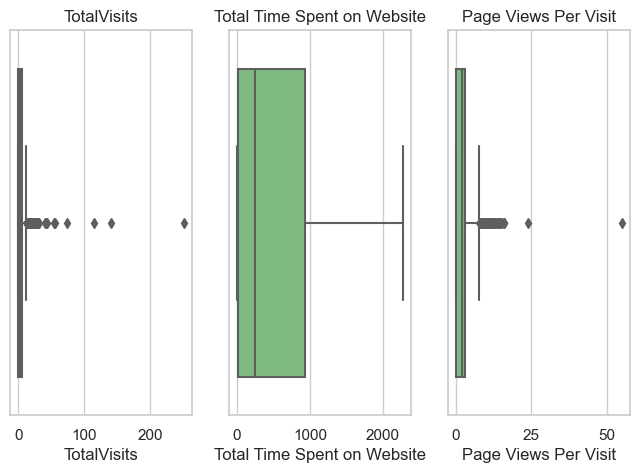

In [48]:
# Let's visualize the outliers

plt.figure(figsize=[8,5])
plt.tight_layout()
sns.set_style('whitegrid')

plt.subplot(1,3,1)
sns.boxplot(data = lead_dr_df, x = 'TotalVisits', palette='Greens_r', orient='v')
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(data = lead_dr_df, x = 'Total Time Spent on Website', palette='Greens_r', orient='v')
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
sns.boxplot(data = lead_dr_df, x = 'Page Views Per Visit', palette='Greens_r', orient='v')
plt.title('Page Views Per Visit')

plt.show()

- From the above boxplots we can observe two have high outlier variables in our dataset __('TotalVisits' and 'Page Views Per Visit')__. 

In [49]:
lead_dr_df['TotalVisits'].describe()

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

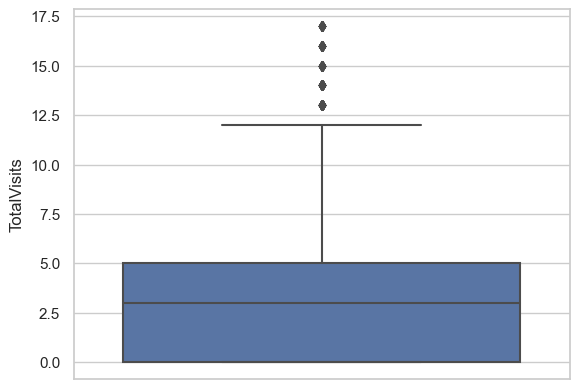

In [50]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 =lead_dr_df.TotalVisits.quantile(0.99)
lead_dr_df = lead_dr_df[(lead_dr_df.TotalVisits <= Q3)]

Q1 = lead_dr_df.TotalVisits.quantile(0.01)
lead_dr_df = lead_dr_df[(lead_dr_df.TotalVisits >= Q1)]

sns.boxplot(y=lead_dr_df['TotalVisits'])
plt.show()

In [51]:
lead_dr_df['Page Views Per Visit'].describe()

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

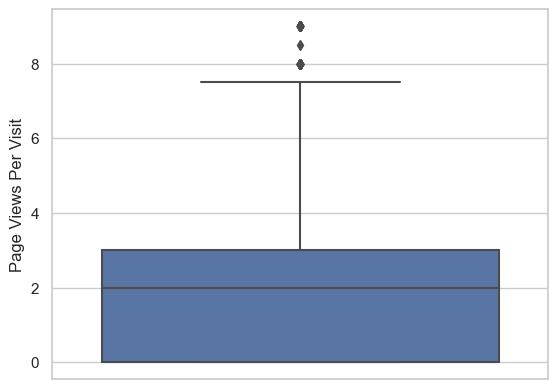

In [52]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_dr_df['Page Views Per Visit'].quantile(0.99)
lead_dr_df = lead_dr_df[lead_dr_df['Page Views Per Visit'] <= Q3]

Q1 = lead_dr_df['Page Views Per Visit'].quantile(0.01)
lead_dr_df = lead_dr_df[lead_dr_df['Page Views Per Visit'] >= Q1]

sns.boxplot(y=lead_dr_df['Page Views Per Visit'])
plt.show()

In [53]:
lead_dr_df['Page Views Per Visit'].describe()

count    9090.000000
mean        2.232693
std         1.901055
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

- The outliers have been removed from the dataset, now our data is clean and free from outliers.

### Lets split the data

In [54]:
# Separating the Target Variable

y = lead_dr_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
# Remaining dataset

X = lead_dr_df.drop('Converted', axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Blog  \
0                        0                           0                 0   
1                        0                           0                 0   
2                        0                           0                 0   
3                        0                           0                 0   
4                        0                           0                 0   

   Lead Source_Click2call  Lead Source_Direct traffic  Lead Source_Facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                           1                     0   
3                       0                           1                     0   
4                       0                           0                     0   

   Lead Source_Google  Lead Source_Live chat  Lead Source_Nc_edm  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark chat  Lead Source_Organic search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per click ads  Lead Source_Press_release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0  

In [56]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=120)

### Feature Scaling

In [57]:
scaler = MinMaxScaler()

In [58]:
# Scaling the Total Time Spent on Website for the easy analysis and as we saw above in box plot it had a wide range

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

In [59]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3677             0            0          3.0                     0.586329   
707              0            0          3.0                     0.029294   
1208             0            0          1.0                     0.067909   
2720             0            0          2.0                     0.223702   
5043             0            0          5.0                     0.255659   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
3677                   3.0       0                  0                   0   
707                    3.0       0                  0                   0   
1208                   1.0       0                  0                   0   
2720                   2.0       0                  0                   0   
5043                   5.0       0                  0                   0   

      Newspaper  Digital Advertisement  Through Recommendations  \
3677          0                      0                        0   
707           0                      0                        0   
1208          0                      0                        0   
2720          0                      0                        0   
5043          0                      0                        0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3677                                    1                          0   
707                                     1                          0   
1208                                    0                          0   
2720                                    1                          0   
5043                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Blog  \
3677                        0                           0                 0   
707                         0                           0                 0   
1208                        0                           0                 0   
2720                        0                           0                 0   
5043                        0                           0                 0   

      Lead Source_Click2call  Lead Source_Direct traffic  \
3677                       0                           0   
707                        0                           0   
1208                       0                           0   
2720                       0                           1   
5043                       0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live chat  \
3677                     0                   1                      0   
707                      0                   1                      0   
1208                     0                   0                      0   
2720                     0                   0                      0   
5043                     0                   1                      0   

      Lead Source_Nc_edm  Lead Source_Olark chat  Lead Source_Organic search  \
3677                   0                       0                           0   
707                    0                       0                           0   
1208                   0                       0                           1   
2720                   0                       0                           0   
5043                   0                       0                           0   

      Lead Source_Pay per click ads  Lead Source_Press_release  \
3677                              0                          0   
707                               0                          0   
1208                              0                          0   
2720                              0                          0   
5043                              0                          0   

      Lead Source_Reference  Lead Source_Referral sites  \
3677                      0     

In [60]:
# Lets check the conversion rate of leads from 'Converted' column

round((sum(y)/len(y.index)*100),2)

38.45

- We have a conversion rate of __~38.45 %__.

### Correlation of the dataset

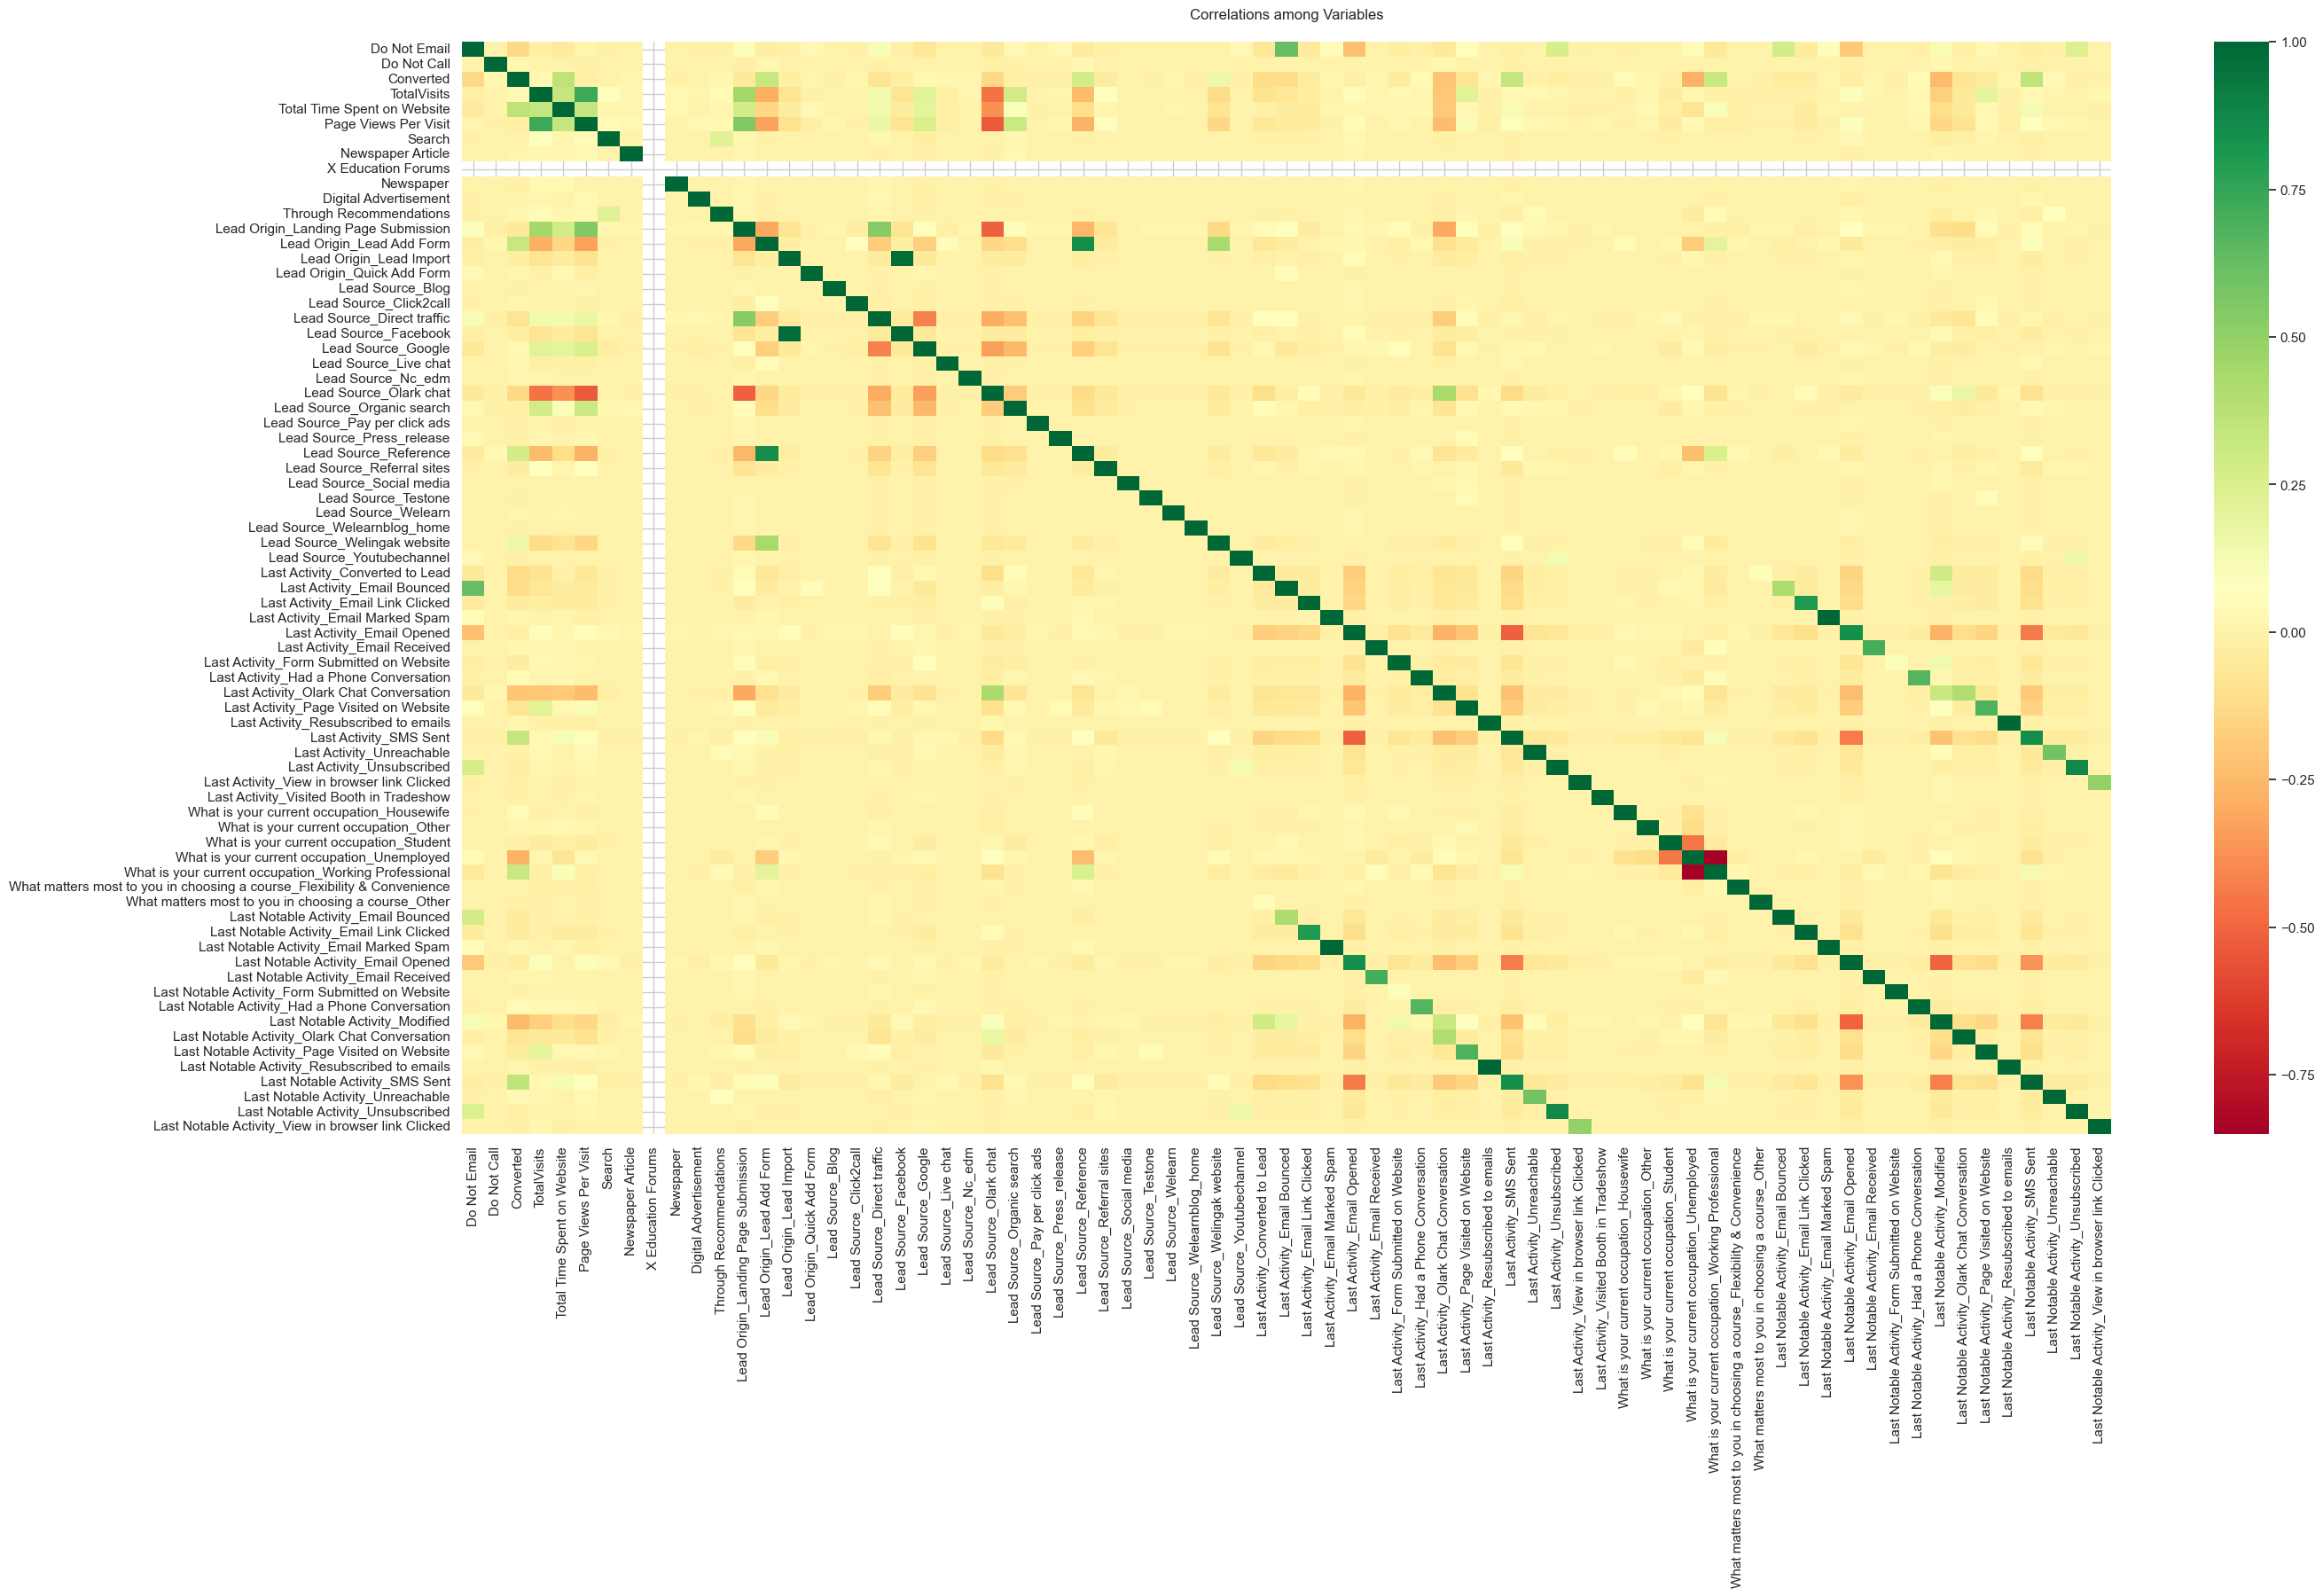

In [61]:
# With the help of Heatmap we can identify the high correlated data.

plt.figure(figsize=[30,16])

sns.heatmap(lead_dr_df.corr(),cmap='RdYlGn')

plt.title('Correlations among Variables\n')

plt.show()

* From the above we see that X Education Forums has no data so lets remove from the dataset.
* Also lets remove the highly correlated variables

In [62]:

high_corr = ['X Education Forums','Lead Source_Olark chat', 'What is your current occupation_Unemployed']

X_train = X_train.drop(high_corr,1)
X_test = X_test.drop(high_corr,1)

In [63]:
# Checking for the correlation again

plt.figure(figsize=[30,16])

sns.heatmap(lead_dr_df[X_train.columns].corr(),cmap='RdYlGn')

plt.title('Correlations among Variables in X')

plt.show()

* Though removed some of the correlated and null columns but it is quiet difficult to spot the high correlation attributes.
* Lets start building the model and with the help of VIFs and p-Value we will find out the relations.

## Building the Model

In [64]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.4
Date:                Thu, 07 Sep 2023   Deviance:                       5142.7
Time:                        23:39:31   Pearson chi2:                 6.72e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4093
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      23.9066   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                                               -1.5587      0.220     -7.079      0.000      -1.990      -1.127
Do Not Call                                                                25.1112   1.45e+05      0.000      1.000   -2.84e+05    2.84e+05
TotalVisits                                                                 0.1092      0.018      6.080      0.000       0.074       0.144
Total Time Spent on Website                                                 4.6023      0.168     27.328      0.000       4.272       4.932
Page Views Per Visit                                                       -0.1189      0.031     -3.858      0.000      -0.179      -0.059
Search                                                                     -0.5360      0.867     -0.618      0.536      -2.235       1.163
Newspaper Article                                                          26.3065   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Newspaper                                                               -7.784e-10   9.52e-05  -8.18e-06      1.000      -0.000       0.000
Digital Advertisement                                                       0.0712      1.438      0.049      0.961      -2.748       2.891
Through Recommendations                                                     1.4464      1.569      0.922      0.357      -1.628       4.521
Lead Origin_Landing Page Submission                                        -0.0578      0.104     -0.556      0.578      -0.262       0.146
Lead Origin_Lead Add Form                                                   3.2289      0.545      5.925      0.000       2.161       4.297
Lead Origin_Lead Import                                                     1.4093      1.537      0.917      0.359      -1.603       4.422
Lead Origin_Quick Add Form                                              -4.157e-09   5.18e-05  -8.03e-05      1.000      -0.000       0.000
Lead Source_Blog                                                         1.446e-09   4.64e-05   3.12e-05      1.000   -9.09e-05    9.09e-05
Lead Source_Click2call                                                     -1.6535      1.374     -1.203      0.229      -4.347       1.040
Lead Source_Direct traffic                                                 -1.3933      0.160     -8.692      0.000      -1.707      -1.079
Lead Source_Facebook                                                       -2.1757      1.539     -1.413      0.158      -5.193       0.841
Lea

- There are many attributes having an insignificant p-values and we will try out the RFE for the feature elimination.

### RFE

In [65]:
# Instantiating LogisticRegression

logreg=LogisticRegression()

In [66]:
# Running rfe with different variable count

# Running with 20 variables

rfem=RFE(logreg,n_features_to_select=20)
rfem=rfem.fit(X_train,y_train)

In [67]:
# Checking for the true and false for the varibales after rfe

rfem.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False])

In [68]:
col=X_train.columns[rfem.support_]
X_train_1=sm.add_constant(X_train[col])

In [69]:
logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
reg1=logis1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.9
Date:                Thu, 07 Sep 2023   Deviance:                       5217.7
Time:                        23:39:34   Pearson chi2:                 6.86e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3743      0.099      3.772      0.000       0.180       0.569
Do Not Email                                            -1.5747      0.197     -8.013      0.000      -1.960      -1.190
Total Time Spent on Website                              4.6220      0.166     27.824      0.000       4.296       4.948
Lead Origin_Lead Add Form                                2.6778      0.202     13.281      0.000       2.283       3.073
Lead Source_Direct traffic                              -1.3331      0.115    -11.558      0.000      -1.559      -1.107
Lead Source_Google                                      -0.9832      0.109     -9.050      0.000      -1.196      -0.770
Lead Source_Organic search                              -1.1466      0.133     -8.609      0.000      -1.408      -0.886
Lead Source_Referral sites                              -1.1118      0.332     -3.345      0.001      -1.763      -0.460
Lead Source_Welingak website                            23.5851    1.9e+04      0.001      0.999   -3.71e+04    3.72e+04
Last Activity_Converted to Lead                         -1.1120      0.222     -5.016      0.000      -1.547      -0.677
Last Activity_Email Bounced                             -1.0159      0.373     -2.725      0.006      -1.747      -0.285
Last Activity_Olark Chat Conversation                   -1.1358      0.188     -6.035      0.000      -1.505      -0.767
Last Activity_View in browser link Clicked             -24.7911   1.02e+05     -0.000      1.000   -1.99e+05    1.99e+05
What is your current occupation_Housewife               25.1343   7.35e+04      0.000      1.000   -1.44e+05    1.44e+05
What is your current occupation_Working Professional     2.6562      0.187     14.179      0.000       2.289       3.023
Last Notable Activity_Email Link Clicked                -1.9392      0.261     -7.444      0.000      -2.450      -1.429
Last Notable Activity_Email Opened                      -1.4648      0.089    -16.425      0.000      -1.640      -1.290
Last Notable Activity_Had a Phone Conversation           1.3620      1.183      1.151      0.250      -0.957       3.681
Last Notable Activity_Modified                          -1.7914      0.102    -17.594      0.000      -1.991      -1.592
Last Notable Activity_Olark Chat Conversation           -2.1411      0.395     -5.423      0.000      -2.915      -1.367
Last Notable Activity_Page Visited on Website           -1.8290      0.209     -8.749      0.000      -2.239      -1.419
========================================================================================================================
"""

In [70]:
vif=pd.DataFrame()
vif["Features"]=X_train_1[col].columns
vif["VIF"]=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
17                     Last Notable Activity_Modified  2.52
1                         Total Time Spent on Website  2.24
4                                  Lead Source_Google  2.20
3                          Lead Source_Direct traffic  2.12
10              Last Activity_Olark Chat Conversation  1.85
0                                        Do Not Email  1.84
9                         Last Activity_Email Bounced  1.77
15                 Last Notable Activity_Email Opened  1.69
2                           Lead Origin_Lead Add Form  1.54
5                          Lead Source_Organic search  1.47
18      Last Notable Activity_Olark Chat Conversation  1.41
7                        Lead Source_Welingak website  1.30
8                     Last Activity_Converted to Lead  1.27
13  What is your current occupation_Working Profes...  1.18
19      Last Notable Activity_Page Visited on Website  1.09
6                          Lead Source_Referral sites  1.05
14           Last Notable Activity_Email Link Clicked  1.03
12          What is your current occupation_Housewife  1.01
11         Last Activity_View in browser link Clicked  1.00
16     Last Notable Activity_Had a Phone Conversation  1.00

In [71]:
# Function for model building
def model_build(X_train,y_train):
    X_train=sm.add_constant(X_train)
    logis=sm.GLM(y_train,X_train,family=sm.families.Binomial())
    reg=logis.fit()
    return X_train,logis,reg

In [72]:
X_train_2=X_train_1.drop(["const","Last Activity_View in browser link Clicked"],1)
X_train_2,logis2,reg2=model_build(X_train_2,y_train)
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.4
Date:                Thu, 07 Sep 2023   Deviance:                       5220.8
Time:                        23:39:34   Pearson chi2:                 6.85e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4020
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3729      0.099      3.759      0.000       0.178       0.567
Do Not Email                                            -1.5725      0.197     -8.002      0.000      -1.958      -1.187
Total Time Spent on Website                              4.6295      0.166     27.870      0.000       4.304       4.955
Lead Origin_Lead Add Form                                2.6803      0.202     13.295      0.000       2.285       3.075
Lead Source_Direct traffic                              -1.3361      0.115    -11.587      0.000      -1.562      -1.110
Lead Source_Google                                      -0.9854      0.109     -9.074      0.000      -1.198      -0.773
Lead Source_Organic search                              -1.1473      0.133     -8.614      0.000      -1.408      -0.886
Lead Source_Referral sites                              -1.1125      0.332     -3.347      0.001      -1.764      -0.461
Lead Source_Welingak website                            23.5839    1.9e+04      0.001      0.999   -3.71e+04    3.72e+04
Last Activity_Converted to Lead                         -1.1058      0.222     -4.991      0.000      -1.540      -0.672
Last Activity_Email Bounced                             -1.0141      0.373     -2.719      0.007      -1.745      -0.283
Last Activity_Olark Chat Conversation                   -1.1309      0.188     -6.010      0.000      -1.500      -0.762
What is your current occupation_Housewife               25.1350   7.35e+04      0.000      1.000   -1.44e+05    1.44e+05
What is your current occupation_Working Professional     2.6402      0.186     14.211      0.000       2.276       3.004
Last Notable Activity_Email Link Clicked                -1.9374      0.260     -7.438      0.000      -2.448      -1.427
Last Notable Activity_Email Opened                      -1.4631      0.089    -16.410      0.000      -1.638      -1.288
Last Notable Activity_Had a Phone Conversation           1.3653      1.183      1.154      0.249      -0.954       3.685
Last Notable Activity_Modified                          -1.7948      0.102    -17.638      0.000      -1.994      -1.595
Last Notable Activity_Olark Chat Conversation           -2.1452      0.395     -5.434      0.000      -2.919      -1.371
Last Notable Activity_Page Visited on Website           -1.8277      0.209     -8.742      0.000      -2.237      -1.418
========================================================================================================================
"""

In [73]:
X_train_3=X_train_2.drop(["const","What is your current occupation_Housewife"],1)
X_train_3,logis3,reg3=model_build(X_train_3,y_train)
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.9
Date:                Thu, 07 Sep 2023   Deviance:                       5227.7
Time:                        23:39:34   Pearson chi2:                 6.87e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4014
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3708      0.099      3.739      0.000       0.176       0.565
Do Not Email                                            -1.5751      0.197     -8.011      0.000      -1.960      -1.190
Total Time Spent on Website                              4.6360      0.166     27.918      0.000       4.311       4.961
Lead Origin_Lead Add Form                                2.6948      0.201     13.386      0.000       2.300       3.089
Lead Source_Direct traffic                              -1.3352      0.115    -11.585      0.000      -1.561      -1.109
Lead Source_Google                                      -0.9848      0.109     -9.071      0.000      -1.198      -0.772
Lead Source_Organic search                              -1.1462      0.133     -8.611      0.000      -1.407      -0.885
Lead Source_Referral sites                              -1.1148      0.332     -3.353      0.001      -1.766      -0.463
Lead Source_Welingak website                            22.5692   1.15e+04      0.002      0.998   -2.25e+04    2.26e+04
Last Activity_Converted to Lead                         -1.1111      0.222     -5.015      0.000      -1.545      -0.677
Last Activity_Email Bounced                             -1.0159      0.373     -2.723      0.006      -1.747      -0.285
Last Activity_Olark Chat Conversation                   -1.1343      0.188     -6.028      0.000      -1.503      -0.765
What is your current occupation_Working Professional     2.6374      0.186     14.192      0.000       2.273       3.002
Last Notable Activity_Email Link Clicked                -1.9377      0.261     -7.435      0.000      -2.448      -1.427
Last Notable Activity_Email Opened                      -1.4591      0.089    -16.372      0.000      -1.634      -1.284
Last Notable Activity_Had a Phone Conversation           1.3659      1.184      1.154      0.248      -0.954       3.686
Last Notable Activity_Modified                          -1.7904      0.102    -17.605      0.000      -1.990      -1.591
Last Notable Activity_Olark Chat Conversation           -2.1419      0.395     -5.424      0.000      -2.916      -1.368
Last Notable Activity_Page Visited on Website           -1.8285      0.209     -8.742      0.000      -2.238      -1.419
========================================================================================================================
"""

In [74]:
X_train_4=X_train_3.drop(["const","Lead Source_Welingak website"],1)
X_train_4,logis4,reg4=model_build(X_train_4,y_train)
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.6
Date:                Thu, 07 Sep 2023   Deviance:                       5253.2
Time:                        23:39:34   Pearson chi2:                 7.37e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3990
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3794      0.099      3.828      0.000       0.185       0.574
Do Not Email                                            -1.5790      0.196     -8.047      0.000      -1.964      -1.194
Total Time Spent on Website                              4.6413      0.166     27.911      0.000       4.315       4.967
Lead Origin_Lead Add Form                                3.0780      0.196     15.685      0.000       2.693       3.463
Lead Source_Direct traffic                              -1.3451      0.115    -11.663      0.000      -1.571      -1.119
Lead Source_Google                                      -1.0001      0.109     -9.191      0.000      -1.213      -0.787
Lead Source_Organic search                              -1.1559      0.133     -8.680      0.000      -1.417      -0.895
Lead Source_Referral sites                              -1.1246      0.332     -3.383      0.001      -1.776      -0.473
Last Activity_Converted to Lead                         -1.1067      0.221     -4.997      0.000      -1.541      -0.673
Last Activity_Email Bounced                             -1.0193      0.370     -2.752      0.006      -1.745      -0.293
Last Activity_Olark Chat Conversation                   -1.1402      0.188     -6.056      0.000      -1.509      -0.771
What is your current occupation_Working Professional     2.6237      0.186     14.074      0.000       2.258       2.989
Last Notable Activity_Email Link Clicked                -1.9337      0.259     -7.459      0.000      -2.442      -1.426
Last Notable Activity_Email Opened                      -1.4584      0.089    -16.375      0.000      -1.633      -1.284
Last Notable Activity_Had a Phone Conversation           1.3703      1.183      1.158      0.247      -0.949       3.690
Last Notable Activity_Modified                          -1.7919      0.102    -17.643      0.000      -1.991      -1.593
Last Notable Activity_Olark Chat Conversation           -2.0945      0.388     -5.405      0.000      -2.854      -1.335
Last Notable Activity_Page Visited on Website           -1.8239      0.209     -8.737      0.000      -2.233      -1.415
========================================================================================================================
"""

In [75]:
X_train_5=X_train_4.drop(["const","Last Notable Activity_Had a Phone Conversation"],1)
X_train_5,logis5,reg5=model_build(X_train_5,y_train)
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.4
Date:                Thu, 07 Sep 2023   Deviance:                       5254.8
Time:                        23:39:34   Pearson chi2:                 7.37e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3837      0.099      3.873      0.000       0.190       0.578
Do Not Email                                            -1.5830      0.196     -8.068      0.000      -1.968      -1.198
Total Time Spent on Website                              4.6373      0.166     27.904      0.000       4.312       4.963
Lead Origin_Lead Add Form                                3.0781      0.196     15.683      0.000       2.693       3.463
Lead Source_Direct traffic                              -1.3428      0.115    -11.646      0.000      -1.569      -1.117
Lead Source_Google                                      -0.9960      0.109     -9.160      0.000      -1.209      -0.783
Lead Source_Organic search                              -1.1552      0.133     -8.675      0.000      -1.416      -0.894
Lead Source_Referral sites                              -1.1232      0.332     -3.379      0.001      -1.775      -0.472
Last Activity_Converted to Lead                         -1.1068      0.221     -4.998      0.000      -1.541      -0.673
Last Activity_Email Bounced                             -1.0180      0.370     -2.748      0.006      -1.744      -0.292
Last Activity_Olark Chat Conversation                   -1.1396      0.188     -6.053      0.000      -1.509      -0.771
What is your current occupation_Working Professional     2.6232      0.186     14.074      0.000       2.258       2.989
Last Notable Activity_Email Link Clicked                -1.9387      0.259     -7.480      0.000      -2.447      -1.431
Last Notable Activity_Email Opened                      -1.4638      0.089    -16.453      0.000      -1.638      -1.289
Last Notable Activity_Modified                          -1.7971      0.101    -17.708      0.000      -1.996      -1.598
Last Notable Activity_Olark Chat Conversation           -2.0995      0.387     -5.419      0.000      -2.859      -1.340
Last Notable Activity_Page Visited on Website           -1.8291      0.209     -8.765      0.000      -2.238      -1.420
========================================================================================================================
"""

In [76]:
vif=pd.DataFrame()
X_train_5_1=X_train_5.drop("const",1)
vif["Features"]=X_train_5_1.columns

vif['VIF']=[variance_inflation_factor(X_train_5_1.values,i) for i in range(X_train_5_1.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

Features   VIF
13                     Last Notable Activity_Modified  2.52
1                         Total Time Spent on Website  2.23
4                                  Lead Source_Google  2.20
3                          Lead Source_Direct traffic  2.11
0                                        Do Not Email  1.84
9               Last Activity_Olark Chat Conversation  1.84
8                         Last Activity_Email Bounced  1.77
12                 Last Notable Activity_Email Opened  1.69
5                          Lead Source_Organic search  1.47
14      Last Notable Activity_Olark Chat Conversation  1.41
7                     Last Activity_Converted to Lead  1.26
2                           Lead Origin_Lead Add Form  1.21
10  What is your current occupation_Working Profes...  1.15
15      Last Notable Activity_Page Visited on Website  1.09
6                          Lead Source_Referral sites  1.05
11           Last Notable Activity_Email Link Clicked  1.03

### Predictions on Train Data

In [77]:
y_train_pred=reg5.predict(X_train_5)
y_train_pred_final=pd.DataFrame({"Converted":y_train.values,"Converted_probability":y_train_pred,"ID":y_train.index})
y_train_pred_final.head()

Converted  Converted_probability    ID
3677          1               0.655405  3677
707           0               0.093338   707
1208          0               0.033553  1208
2720          0               0.200126  2720
5043          1               0.849754  5043

### ROC Curve Plotting

In [78]:
# Importing libraries for roc_curve

from sklearn.metrics import roc_curve
# imports the roc_curve function from the scikit-learn metrics module. 
#roc_curve is used to calculate the ROC curve for a classification model.
from sklearn.metrics import roc_auc_score


In [79]:
#This code defines a Python function called lead_roc that is used to plot the Receiver Operating Characteristic (ROC) curve for a binary classification model and calculate its area under the curve (AUC) score.
def lead_roc(real, probability):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    fpr, tpr, thresholds = roc_curve(real, probability, drop_intermediate=True)
    
    # Calculating the auc score(area under the curve)
    auc_score = roc_auc_score(real, probability)
    
    # Setting the figure
    plt.figure(figsize=[8,4])
    
    # Plotting the roc_curve
    plt.plot(fpr,tpr,label='ROC Curve (area= %0.2f)' %auc_score)
    
    # Plotting the 45% dotted line
    plt.plot([0,1], [0,1], 'r--')
             
    # Setting the x-axis limit
    plt.xlim([0.0, 1.0])
             
    # Setting the y-axis limit
    plt.ylim([0.0, 1.05])
             
    # Setting the x-axis label
    plt.xlabel('False Positive Rate')
             
    # Setting the y-axis label
    plt.ylabel('True Positive Rate')
             
    # Setting the title
    plt.title('Receiver Operating Characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    plt.legend(loc="lower right")
    
    # Showing the plot
    plt.show()

    # no return         
    return None             

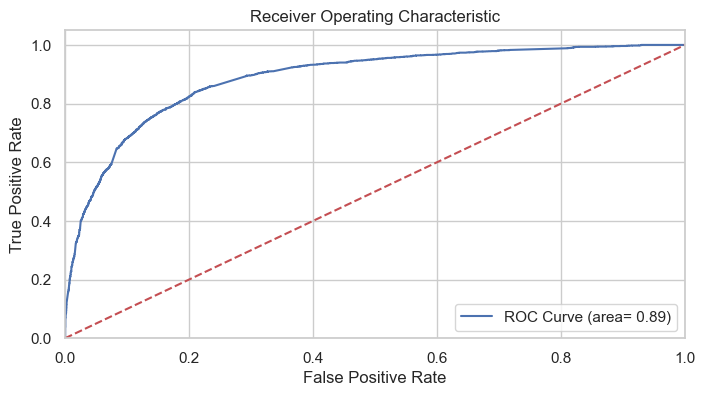

In [80]:
# Calling the roc curve for plotting

lead_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Point to be noted from the ROC Curve

- The curve is closer to the left border than to the right border hence our model is good.
- Area under the ROC curve is 89% of total area



In [81]:
print(round(roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_probability),2))

0.89


In [82]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_probability.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

Converted  Converted_probability    ID  0.0  0.1  0.2  0.3  0.4  0.5  \
3677          1               0.655405  3677    1    1    1    1    1    1   
707           0               0.093338   707    1    0    0    0    0    0   
1208          0               0.033553  1208    1    0    0    0    0    0   
2720          0               0.200126  2720    1    1    1    0    0    0   
5043          1               0.849754  5043    1    1    1    1    1    1   

      0.6  0.7  0.8  0.9  
3677    1    0    0    0  
707     0    0    0    0  
1208    0    0    0    0  
2720    0    0    0    0  
5043    1    1    1    0

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# Creating a dataframe to store all the values to be created from 0 to 0.9 with set size 0.1

df_cutoffs = pd.DataFrame(columns=["Probability", "Accuracy", "Sensitivity", "Specificity"])
var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix = confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i])   
    total = sum(sum(cm_matrix))                                                          
    accuracy = (cm_matrix[0,0]+cm_matrix[1,1])/total                                      
    sensitivity = cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         
    specificity = cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         
    df_cutoffs.loc[i] = [i, accuracy, sensitivity, specificity]                          
print(df_cutoffs)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.386924     1.000000     0.000000
0.1          0.1  0.607261     0.969537     0.378621
0.2          0.2  0.763005     0.909829     0.670341
0.3          0.3  0.807009     0.843217     0.784158
0.4          0.4  0.816124     0.783509     0.836709
0.5          0.5  0.817067     0.708367     0.885670
0.6          0.6  0.796637     0.591795     0.925916
0.7          0.7  0.781864     0.518684     0.947962
0.8          0.8  0.761905     0.435418     0.967957
0.9          0.9  0.707842     0.265638     0.986926


In [85]:
# Ploting line curve of "Accuracy" , "Sensitivity" and "Specificity" for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x = "Probability", y = ["Accuracy", "Sensitivity", "Specificity"])   
plt.show()

Looking at the graph above the accuracy, sensitivity and specificity lines are intersecting at 0.36. So let's choose the cutoff point and check the metrics again.

In [86]:
y_train_pred_final["Predicted"]=y_train_pred_final["Converted_probability"].map(lambda x:1 if x>0.36 else 0)

In [87]:
y_train_pred_final

Converted  Converted_probability    ID  0.0  0.1  0.2  0.3  0.4  0.5  \
3677          1               0.655405  3677    1    1    1    1    1    1   
707           0               0.093338   707    1    0    0    0    0    0   
1208          0               0.033553  1208    1    0    0    0    0    0   
2720          0               0.200126  2720    1    1    1    0    0    0   
5043          1               0.849754  5043    1    1    1    1    1    1   
...         ...                    ...   ...  ...  ...  ...  ...  ...  ...   
3439          1               0.988905  3439    1    1    1    1    1    1   
574           0               0.216930   574    1    1    1    0    0    0   
10            1               0.633060    10    1    1    1    1    1    1   
752           1               0.238266   752    1    1    1    0    0    0   
1206          0               0.072227  1206    1    0    0    0    0    0   

      0.6  0.7  0.8  0.9  Predicted  
3677    1    0    0    0          1  
707     0    0    0    0          0  
1208    0    0    0    0          0  
2720    0    0    0    0          0  
5043    1    1    1    0          1  
...   ...  ...  ...  ...        ...  
3439    1    1    1    1          1  
574     0    0    0    0          0  
10      1    0    0    0          1  
752     0    0    0    0          0  
1206    0    0    0    0          0  

[6363 rows x 14 columns]

In [88]:
confusionmatrix_2 = confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"] )
confusionmatrix_2

array([[3179,  722],
       [ 474, 1988]], dtype=int64)

In [89]:
total = sum(sum(confusionmatrix_2))                                                          
accuracy = (confusionmatrix_2[0,0]+confusionmatrix_2[1,1])/total                                      
sensitivity = confusionmatrix_2[1,1]/(confusionmatrix_2[1,0]+confusionmatrix_2[1,1])                         
specificity = confusionmatrix_2[0,0]/(confusionmatrix_2[0,0]+confusionmatrix_2[0,1])
print("Accuracy",accuracy)
print("Sensitivity",sensitivity)
print("Specificity",specificity)

Accuracy 0.8120383466918121
Sensitivity 0.8074735987002437
Specificity 0.814919251473981


Since our Accuracy,Sensitivity and Specificity are almost same and have decent values, we can conclude that 0.36 is good probability threshold for our case.


### Precision and Recall

In [90]:

print('Precision:',confusionmatrix_2[1,1]/(confusionmatrix_2[0,1]+confusionmatrix_2[1,1]))    
print('Recall:',confusionmatrix_2[1,1]/(confusionmatrix_2[1,0]+confusionmatrix_2[1,1])) 

Precision: 0.7335793357933579
Recall: 0.8074735987002437


In [91]:
# Importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

The precision_recall_curve function is particularly useful for understanding the trade-off between precision and recall at different probability thresholds in a binary classification problem. It allows you to calculate precision and recall scores for various threshold values and can be used to create a precision-recall curve, which is a graphical representation of these scores.

In [92]:
#Creating a precision-recall curve by plotting precision and recall values against different probability thresholds

p ,r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()


## Prediction on test dataset

### Scaling the test data

In [93]:
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

### Making Predictions

In [94]:
# Predicting the test dataset with our final model

test_cols = X_train_5.columns[1:]              # Taking the same column train set has
X_test_final = X_test[test_cols]               # Updating it in the final test set
X_test_final = sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test = reg5.predict(X_test_final)       # Predicting the final test set

In [95]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final = pd.DataFrame({'ID':y_test.index,'Converted':y_test.values,'Converted_Probability':y_pred_test,})

y_test_pred_final.head()

ID  Converted  Converted_Probability
6764  6764          0               0.072227
7812  7812          1               0.282796
8275  8275          0               0.064658
6716  6716          0               0.009307
6809  6809          0               0.020438

In [96]:
# Predicting the outcomes with probability cutoff as 0.36 by creating new columns in the final test dataset

# Predicted value
y_test_pred_final['Predicted'] = y_test_pred_final['Converted_Probability'].map(lambda x:1 if x>0.36 else 0 ) 

y_test_pred_final.head()

ID  Converted  Converted_Probability  Predicted
6764  6764          0               0.072227          0
7812  7812          1               0.282796          0
8275  8275          0               0.064658          0
6716  6716          0               0.009307          0
6809  6809          0               0.020438          0

### Model Evaluation

In [97]:
# Importing the metrics library

from sklearn import metrics

In [98]:
# Checking the accuracy of the test dataset.

print('Accuracy score in predicting test dataset :', metrics.accuracy_score(y_test_pred_final.Converted, 
                                                                           y_test_pred_final.Predicted))

Accuracy score in predicting test dataset : 0.8012467913458012


In [99]:
confusionmatrix_ontest = confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final["Predicted"] )
confusionmatrix_ontest

array([[1366,  328],
       [ 214,  819]], dtype=int64)

In [100]:
total = sum(sum(confusionmatrix_ontest))                                                          
accuracy = (confusionmatrix_ontest[0,0]+confusionmatrix_ontest[1,1])/total                                      
sensitivity = confusionmatrix_ontest[1,1]/(confusionmatrix_ontest[1,0]+confusionmatrix_ontest[1,1])                         
specificity = confusionmatrix_ontest[0,0]/(confusionmatrix_ontest[0,0]+confusionmatrix_ontest[0,1])
print("Accuracy:",accuracy)
print("Sensitivity:",sensitivity)
print("Specificity:",specificity)

Accuracy: 0.8012467913458012
Sensitivity: 0.7928363988383349
Specificity: 0.8063754427390791


In [101]:
# Importing the Precision and Recall metrics

from sklearn.metrics import precision_score, recall_score

In [102]:
# Checking the Precision and Recall score

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, 
                                                                    y_test_pred_final.Predicted))

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, 
                                                              y_test_pred_final.Predicted))

Precision score in predicting test dataset: 0.7140366172624237
Recall score in predicting test dataset: 0.7928363988383349


## Lead Score Assigning

In [103]:
# Creating new columns for lead number and lead score

y_test_pred_final['Lead Number'] = df.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score'] = y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head()

ID  Converted  Converted_Probability  Predicted  Lead Number  \
6764  6764          0               0.072227          0       597956   
7812  7812          1               0.282796          0       589874   
8275  8275          0               0.064658          0       586680   
6716  6716          0               0.009307          0       598294   
6809  6809          0               0.020438          0       597540   

      Lead Score  
6764           7  
7812          28  
8275           6  
6716           1  
6809           2

In [104]:
y_test_pred_final.sort_values(by="Lead Score",ascending=False)

ID  Converted  Converted_Probability  Predicted  Lead Number  \
8052  8052          1               0.997728          1       588111   
8057  8057          0               0.996831          1       588097   
8090  8090          1               0.997728          1       588000   
3113  3113          1               0.997463          1       630010   
8112  8112          1               0.997728          1       587894   
...    ...        ...                    ...        ...          ...   
4095  4095          0               0.009175          0       620635   
7958  7958          0               0.011678          0       588820   
8149  8149          0               0.005758          0       587564   
5285  5285          0               0.007527          0       609219   
4043  4043          0               0.004711          0       621242   

      Lead Score  
8052         100  
8057         100  
8090         100  
3113         100  
8112         100  
...          ...  
4095           1  
7958           1  
8149           1  
5285           1  
4043           0  

[2727 rows x 6 columns]

## Conclusion:

- The Accuracy, Precision and Recall score we got from the test data are in the acceptable region.
- Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are:
    - **Total Time Spent on Website**
    - **Lead Origin_Lead Add Form**
    - **What is your current occupation_Working Professional**